In [412]:
# importing libraries
using FFTW
using CSV
using Tables
using Plots
using DSP

# First test with filter

1. finish this test
2. read on all the stuff and annotate what I'm doing here
3. do another test based on the Prasad Paper

In [413]:
# importing MIT-BIH data; data 100, converted with the physionet stuff
file = CSV.File("100.mitbih") |> Tables.matrix;

In [414]:
sampling_freq = 360
num_samples = 2 * sampling_freq  # equivalent to 2 seconds

#get the first 2 seconds of the ecg
ecg = file[1:num_samples, 1:2]
F = abs.(fftshift(rfft(ecg[:,2])));

In [415]:
# filter the ecg
filter = digitalfilter(Lowpass(0.2), Butterworth(1))
ecg_filt = copy(ecg)
ecg_filt[:,2] = filt(filter, ecg[:, 2])
F_filt = abs.(rfft(ecg_filt[:, 2]));

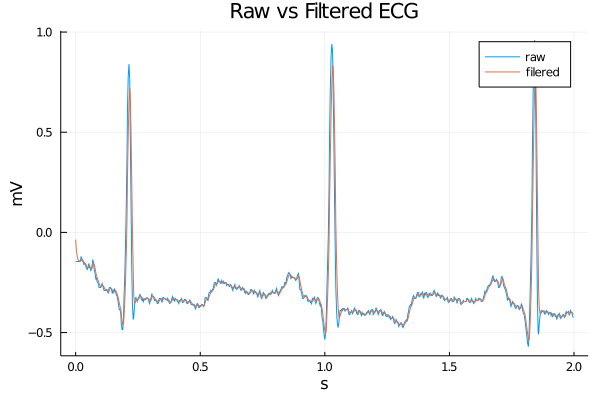

In [416]:
# create a plot of the ecg
p1 = plot(ecg[:,1], ecg[:,2], title="Raw vs Filtered ECG", label="raw")
# and add the filtered ecg
p2 = plot!(ecg_filt[:,1], ecg_filt[:,2], xlabel="s", ylabel="mV", label="filered")

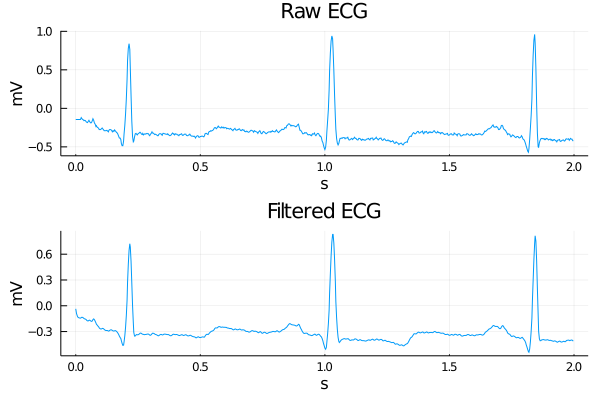

In [417]:
##### create a plot of the ecg
p1 = plot(ecg[:,1], ecg[:,2], title="Raw ECG", xlabel="s", ylabel="mV")
# and add the filtered ecg
p2 = plot(ecg_filt[:,1], ecg_filt[:,2], title="Filtered ECG", xlabel="s", ylabel="mV")
plot(p1, p2, layout=(2,1), label="")

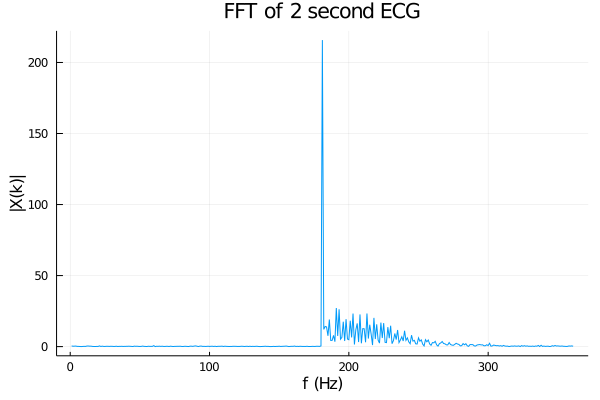

In [418]:
plot(F, title="FFT of 2 second ECG", label="")
    
plot(F, title="FFT of 2 second ECG", label="", xlabel="f (Hz)", ylabel="|X(k)|")

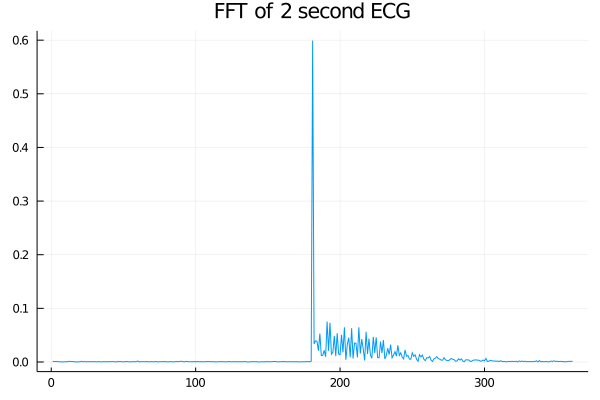

In [419]:
plot(F/sampling_freq, title="FFT of 2 second ECG", label="")

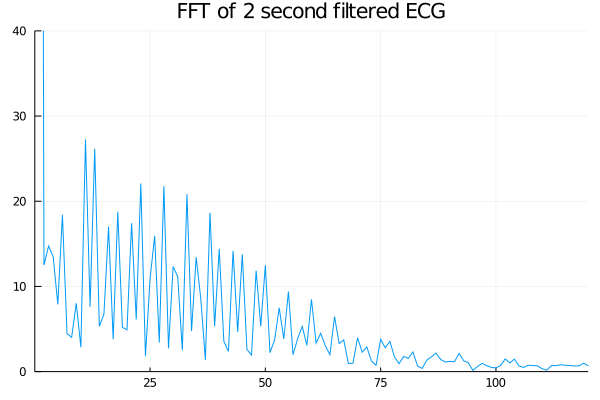

In [420]:
plot(F_filt, title="FFT of 2 second filtered ECG", label="")
ylims!((0,40))
xlims!((0.01,120))

# FFT test

based on [this website](https://www.gaussianwaves.com/2015/11/interpreting-fft-results-obtaining-magnitude-and-phase-information/)

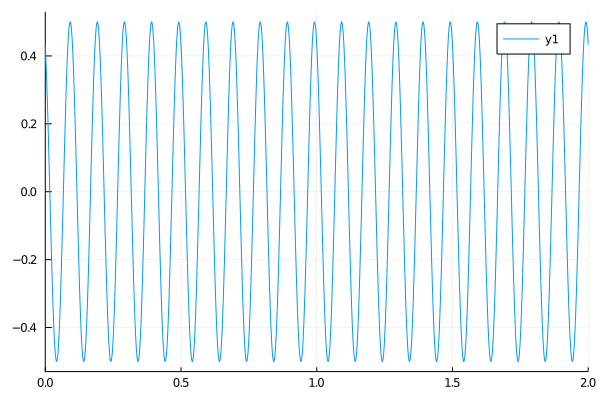

In [421]:
fc = 10
fs = 32 * fc 
A = 0.5
phase = 30
phi = phase * pi / 180

f(x) = A * cos(2 * pi * fc * x + phi)

plot(f, xlim=(0,2))

In [422]:
N = 256
A = [f(x) for x in range(0, step=1/fs, length=N)]

256-element Array{Float64,1}:
  0.43301270189221935
  0.3759199037394887
  0.30438071450436033
  0.22114434510950062
  0.12940952255126048
  0.032701564615071524
 -0.06526309611002569
 -0.1607197326515808
 -0.2499999999999999
 -0.3296729075500344
 -0.3966766701456175
 -0.44843637076634413
 -0.4829629131445341
  ⋮
 -0.12940952255126287
 -0.03270156461507089
  0.0652630961100261
  0.16071973265158077
  0.2499999999999997
  0.3296729075500339
  0.39667667014561697
  0.4484363707663451
  0.4829629131445337
  0.49892946161930185
  0.4957224306869055
  0.47346506474755257

In [423]:
X = 1/N * fftshift(fft(A));

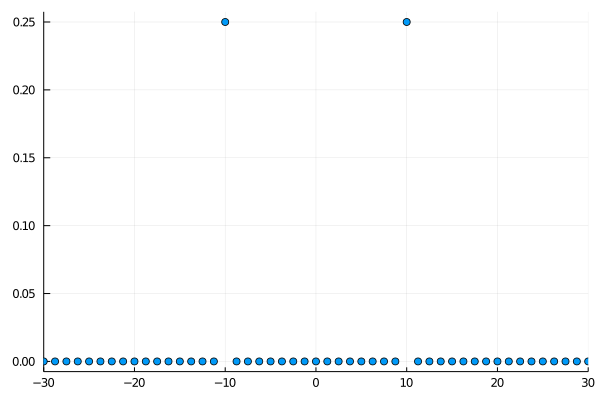

In [424]:
# samples is the number of samples; 32 factor of oversampling * frequency of 10
df = fs / N
sam_freq = (-N/2):(N/2-1)
frequencies = sam_freq * df
plot(frequencies, abs.(X), label="", xlim=(-30,30), seriestype = :scatter)

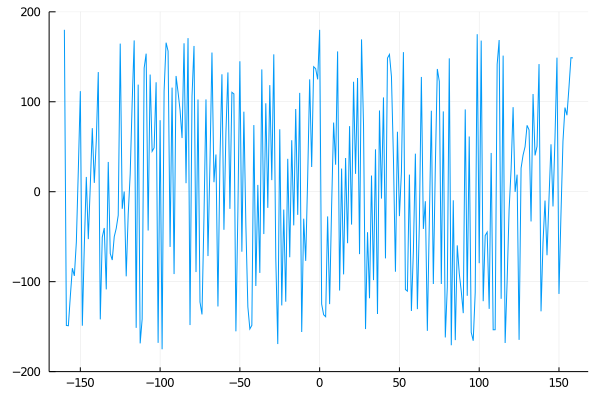

In [425]:
phase = [atan(imag(i), real(i)) for i in X] * 180 / pi
plot(frequencies, phase, label="", ylim=(-200,200))

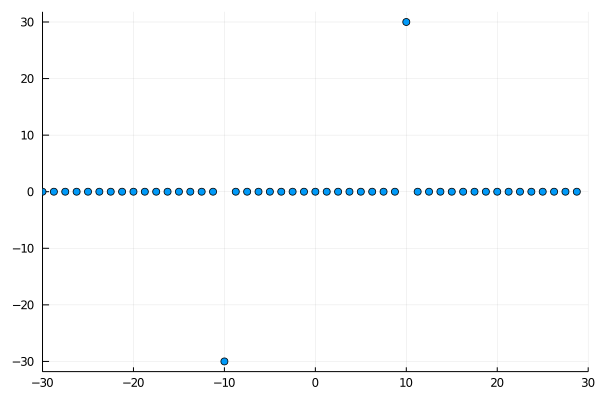

In [426]:
X2 = copy(X)

threshold = maximum(abs, X) / 10000

for i in 1:length(X2)
    if abs.(X2[i]) < threshold
        X2[i] = 0
    end
end

phase = [atan(imag(i), real(i)) for i in X2] * 180 / pi
plot(frequencies, phase, seriestype = :scatter, label="", xlim=(-30,30))

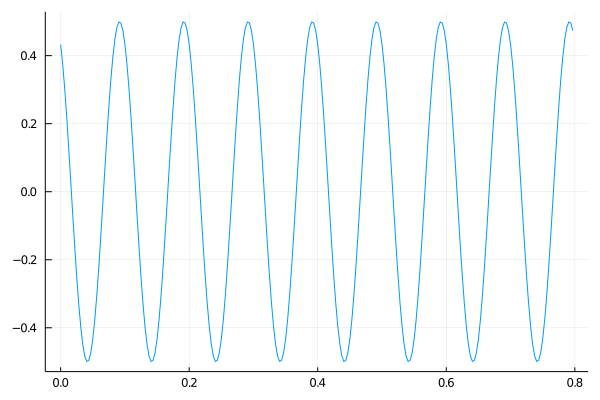

In [427]:
plot(range(0, step=1/fs, length=N), real(ifft(ifftshift(N*X))), label="")

# Test using methods on ecg

In [466]:
# importing MIT-BIH data; data 100, converted with the physionet stuff
file = CSV.File("100.mitbih") |> Tables.matrix;

fc = 360
fs = fc        # TODO: maybe oversample here
N = 2 * fs     # equivalent to 2 seconds

#get the first 2 seconds of the ecg
ecg = file[1:N, 1:2]

# filter the ecg
filter = digitalfilter(Lowpass(0.2), Butterworth(1));

In [534]:
F  = 1/N * fftshift(fft(ecg[:,2]));
Ff = 1/N * fftshift(fft(filt(filter, ecg[:, 2])));

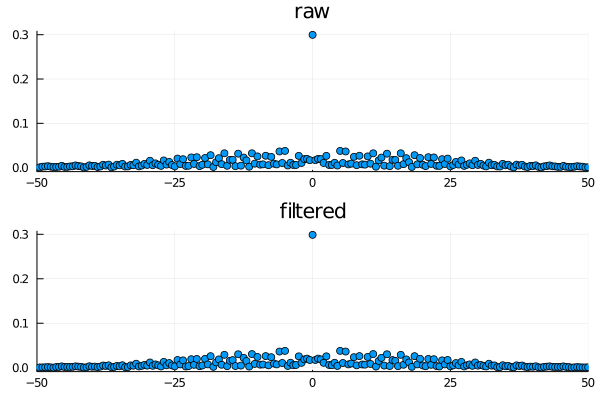

In [535]:
df = fs / N
sam_freq = (-N/2):(N/2-1)
frequencies = sam_freq * df
p1 = plot(frequencies, abs.(F), seriestype = :scatter, title="raw", xlim=(-50,50))
p2 = plot(frequencies, abs.(Ff), seriestype = :scatter, title="filtered", xlim=(-50,50))
plot(p1, p2, layout=(2,1), label="")

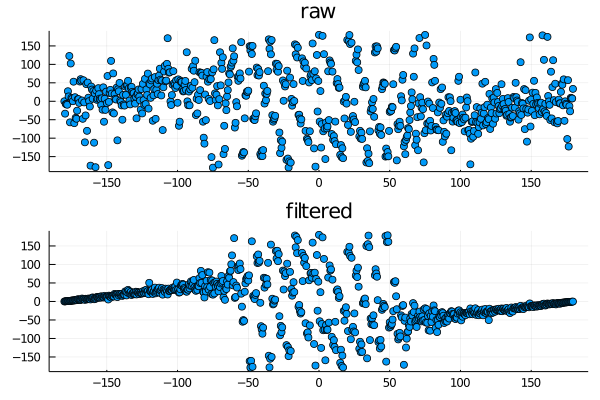

In [536]:
# raw phases
phase = [atan(imag(i), real(i)) for i in F] * 180 / pi
p1 = plot(frequencies, phase, seriestype = :scatter, label="", title="raw")

phasef = [atan(imag(i), real(i)) for i in Ff] * 180 / pi
p2 = plot(frequencies, phasef, seriestype = :scatter, label="", title="filtered")

plot(p1, p2, layout=(2,1), label="")

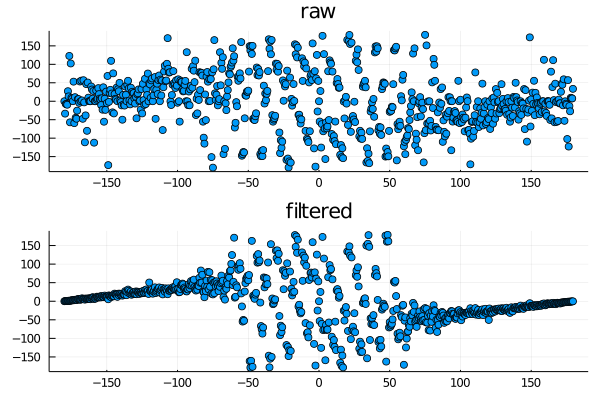

In [567]:
# filtered

den = 300

F2 = copy(F)

for i in 1:length(F2)
    if abs.(F2[i]) < 0.0001 || abs.(F2[i]) > 0.04
        F2[i] = 0
    end
end

phase = [atan(imag(i), real(i)) for i in F2] * 180 / pi
p1 = plot(frequencies, phase, seriestype = :scatter, label="", title="raw")

Ff2 = copy(Ff)

threshold = maximum(abs, Ff) / den

for i in 1:length(Ff2)
    if abs.(Ff2[i]) < 0.0001 || abs.(Ff2[i]) > 0.04
        Ff2[i] = 0
    end
end
phasef = [atan(imag(i), real(i)) for i in Ff2] * 180 / pi
p2 = plot(frequencies, phasef, seriestype = :scatter, label="", title="filtered")

plot(p1, p2, layout=(2,1), label="")

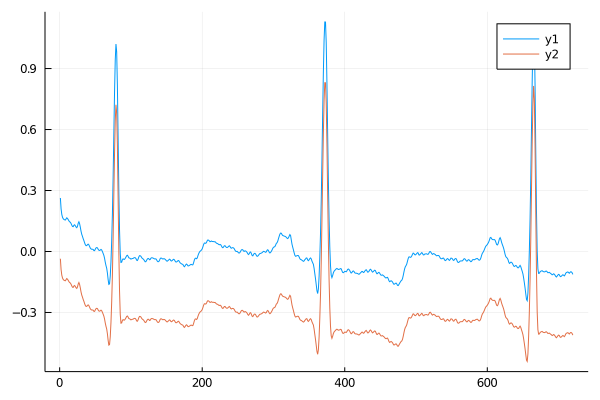

In [568]:
plot(real(ifft(ifftshift(N*Ff2))))
plot!(real(ifft(ifftshift(N*Ff))))